In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
feature_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

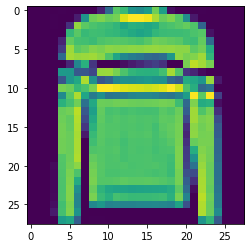

In [7]:
plt.figure()
plt.imshow(train_images[5])
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation="sigmoid"),
                         keras.layers.Dense(10, activation="softmax")])

In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5397 - accuracy: 0.8165
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.8793
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8869
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.8957
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2704 - accuracy: 0.9005
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9035
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.249

In [20]:
test_loss, tess_acc = model.evaluate(test_images, test_labels, verbose=1)

print(tess_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8825
0.8824999928474426


In [21]:
pred = model.predict(test_images)
print(pred[0])
print(np.argmax(pred[0]))
test_labels[0]

[1.7338016e-06 2.2284801e-06 4.3234295e-06 8.9229616e-06 6.2149716e-06
 1.1240217e-02 9.8364162e-06 4.3463454e-02 3.2282773e-05 9.4523084e-01]
9


9

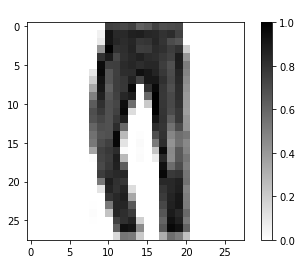

In [23]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)